# WeatherPy
----

There is negative correlation between latitude and average maximum temperatures in the northern hemisphere. The data has more variance the as latitude increases.
There is a positive correlation between latitude and maximum temperatures in the southern hemisphere. However, the correlation is not as strong as the correlation we see in the northern hemisphere.
It appears latitude is not correlated with windiness or cloudiness.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import time

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

586

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + weather_api_key + "&q=" + cities[0]
weather_response = requests.get(query_url)
weather_json = weather_response.json()
pprint(weather_json)

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 62.456, 'lon': -114.3525},
 'dt': 1611699353,
 'id': 6185377,
 'main': {'feels_like': 242.32,
          'humidity': 64,
          'pressure': 1025,
          'temp': 249.02,
          'temp_max': 249.26,
          'temp_min': 248.71},
 'name': 'Yellowknife',
 'sys': {'country': 'CA',
         'id': 1007,
         'sunrise': 1611678041,
         'sunset': 1611703149,
         'type': 1},
 'timezone': -25200,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 90, 'speed': 4.12}}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

# add the coords to these lists
lats = []
lons = []
clouds = []
dates = []
list_of_cities = []
max_temps = []
wind_speeds = []
countries = []
humidities = []
record_counter = 0
sets = 1

# start loop to get through our cities 
for city in cities:

    try:
        # Build query URL
        query_url = url + "appid=" + weather_api_key + "&q=" + city

        weather_response = requests.get(query_url)
        weather_json = weather_response.json()

        # select the latitude/lon from the json response
        lat = weather_json["coord"]["lat"]
        lon = weather_json["coord"]["lon"]
        cloud = weather_json["clouds"]["all"]
        max_temp = weather_json["main"]["temp_max"]
        wind_speed = weather_json["wind"]["speed"]
        country = weather_json["sys"]["country"]
        humidity = weather_json["main"]["humidity"]
        
        # select date and convert that code to Date using strftime
        date = weather_json["dt"]
        date = time.strftime("%D", time.localtime(int(date)))

        # add those results to the lists 
        lats.append(lat)
        lons.append(lon)
        clouds.append(cloud)
        dates.append(date)
        list_of_cities.append(city)
        max_temps.append(max_temp)
        wind_speeds.append(wind_speed)
        countries.append(country)
        humidities.append(humidity)
        
        print(f'Processing Record {record_counter} of Set {sets} | {city}')
        record_counter += 1
        
        if record_counter == 50:
            sets += 1
            record_counter = 0
        time.sleep()
#         pprint(weather_json)
    except:
        print("City not found")
        pass 

Processing Record 0 of Set 1 | yellowknife
City not found
Processing Record 1 of Set 1 | new norfolk
City not found
Processing Record 2 of Set 1 | talnakh
City not found
City not found
Processing Record 3 of Set 1 | raudeberg
City not found
Processing Record 4 of Set 1 | la ronge
City not found
City not found
Processing Record 5 of Set 1 | punta arenas
City not found
Processing Record 6 of Set 1 | kruisfontein
City not found
Processing Record 7 of Set 1 | dingle
City not found
Processing Record 8 of Set 1 | hermanus
City not found
Processing Record 9 of Set 1 | atuona
City not found
City not found
Processing Record 10 of Set 1 | toamasina
City not found
Processing Record 11 of Set 1 | busselton
City not found
Processing Record 12 of Set 1 | albany
City not found
Processing Record 13 of Set 1 | dakar
City not found
Processing Record 14 of Set 1 | saskylakh
City not found
Processing Record 15 of Set 1 | klaksvik
City not found
Processing Record 16 of Set 1 | rikitea
City not found
Proces

Processing Record 44 of Set 3 | muros
City not found
Processing Record 45 of Set 3 | port blair
City not found
Processing Record 46 of Set 3 | vila franca do campo
City not found
Processing Record 47 of Set 3 | peniche
City not found
Processing Record 48 of Set 3 | beringovskiy
City not found
Processing Record 49 of Set 3 | vardo
City not found
Processing Record 0 of Set 4 | omsukchan
City not found
Processing Record 1 of Set 4 | qaanaaq
City not found
Processing Record 2 of Set 4 | tchaourou
City not found
City not found
Processing Record 3 of Set 4 | port alfred
City not found
Processing Record 4 of Set 4 | gold coast
City not found
City not found
Processing Record 5 of Set 4 | castro
City not found
Processing Record 6 of Set 4 | gazli
City not found
Processing Record 7 of Set 4 | waddan
City not found
Processing Record 8 of Set 4 | masindi
City not found
Processing Record 9 of Set 4 | yaan
City not found
Processing Record 10 of Set 4 | saldanha
City not found
Processing Record 11 of

City not found
Processing Record 37 of Set 6 | kpandae
City not found
Processing Record 38 of Set 6 | ocean city
City not found
Processing Record 39 of Set 6 | keelung
City not found
Processing Record 40 of Set 6 | lawton
City not found
Processing Record 41 of Set 6 | buzmeyin
City not found
Processing Record 42 of Set 6 | sayanogorsk
City not found
Processing Record 43 of Set 6 | disraeli
City not found
Processing Record 44 of Set 6 | marsa matruh
City not found
Processing Record 45 of Set 6 | vestmannaeyjar
City not found
Processing Record 46 of Set 6 | pandan
City not found
Processing Record 47 of Set 6 | ahipara
City not found
Processing Record 48 of Set 6 | te anau
City not found
Processing Record 49 of Set 6 | hami
City not found
Processing Record 0 of Set 7 | taveta
City not found
Processing Record 1 of Set 7 | mayumba
City not found
Processing Record 2 of Set 7 | norman wells
City not found
Processing Record 3 of Set 7 | denpasar
City not found
Processing Record 4 of Set 7 | ka

Processing Record 32 of Set 9 | salem
City not found
Processing Record 33 of Set 9 | olafsvik
City not found
Processing Record 34 of Set 9 | mana
City not found
Processing Record 35 of Set 9 | muncar
City not found
Processing Record 36 of Set 9 | srednekolymsk
City not found
City not found
Processing Record 37 of Set 9 | mitu
City not found
Processing Record 38 of Set 9 | kilindoni
City not found
Processing Record 39 of Set 9 | fort nelson
City not found
Processing Record 40 of Set 9 | north myrtle beach
City not found
Processing Record 41 of Set 9 | howard springs
City not found
Processing Record 42 of Set 9 | grand-santi
City not found
Processing Record 43 of Set 9 | lillooet
City not found
Processing Record 44 of Set 9 | monte carmelo
City not found
Processing Record 45 of Set 9 | sao filipe
City not found
Processing Record 46 of Set 9 | lata
City not found
Processing Record 47 of Set 9 | colares
City not found
Processing Record 48 of Set 9 | filingue
City not found
City not found
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# [((x−273.15) * 9/5 + 32) for x in max_temps]
a = np.array(max_temps)
f_temps = (a-273.15) * 9/5 + 32

# set up dictionary with the lists we created
weather_dict = {
    "Date": dates,
    "Cities": list_of_cities,
    "Lat": lats,
    "Lon": lons,
    "Cloudiness(%)": clouds,
    "Max Temp": f_temps,
    "Wind Speed": wind_speeds,
    "Country": country,
    "Humidity": humidities
}

# put together our dictionary into a dataframe
df = pd.DataFrame(weather_dict)
# write to csv
df.to_csv("output.csv", header= True)
#show dataframe
df

,Date,Cities,Lat,Lon,Cloudiness(%),Max Temp,Wind Speed,Country,Humidity
0,01/26/21,yellowknife,62.4560,-114.3525,75,-11.002,4.12,KZ,64
1,01/26/21,new norfolk,-42.7826,147.0587,8,57.002,0.89,KZ,61
2,01/26/21,talnakh,69.4865,88.3972,100,-22.792,3.86,KZ,81
3,01/26/21,raudeberg,61.9875,5.1352,20,30.200,3.60,KZ,93
4,01/26/21,la ronge,55.1001,-105.2842,37,-16.600,2.06,KZ,69
...,...,...,...,...,...,...,...,...,...
538,01/26/21,notodden,59.5594,9.2585,0,8.996,1.30,KZ,88
539,01/26/21,hantsport,45.0668,-64.1654,97,33.800,2.06,KZ,80
540,01/26/21,matay,28.4190,30.7792,100,52.070,1.38,KZ,43
541,01/26/21,acapulco,16.8634,-99.8901,2,82.976,3.56,KZ,60


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
city_df_humid = df.loc[df['Humidity']>100]
if city_df_humid.empty:
    print("No cities with humidity over 100")

No cities with humidity over 100


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

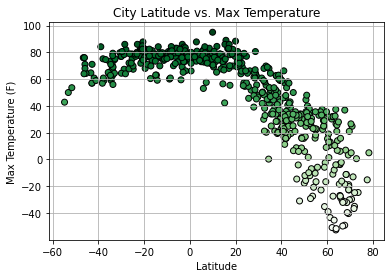

In [8]:
x = df["Lat"]
y = df["Max Temp"]

# set color of y values to gradient
plt.scatter(x, y, c=y, cmap="Greens", edgecolor="black")

#make the graph pretty
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature")
plt.grid()

plt.show()

## Latitude vs. Humidity Plot

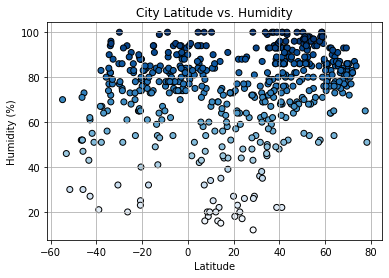

In [9]:
x = df["Lat"]
y = df["Humidity"]

# set color of y values to gradient
plt.scatter(x, y, c=y, cmap="Blues", edgecolor="black")

#make the graph pretty
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")
plt.grid()

plt.show()

## Latitude vs. Cloudiness Plot

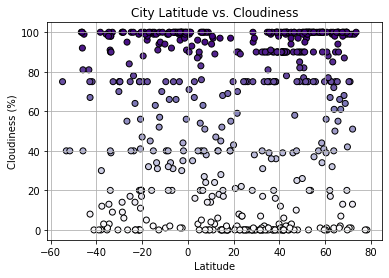

In [10]:
x = df["Lat"]
y = df["Cloudiness(%)"]

# set color of y values to gradient
plt.scatter(x, y, c=y, cmap="Purples", edgecolor="black")

#make the graph pretty
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.grid()

plt.show()

## Latitude vs. Wind Speed Plot

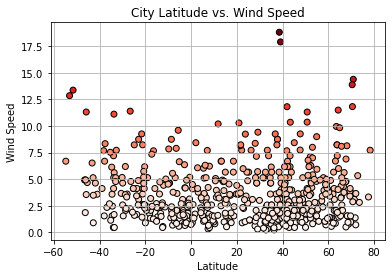

In [11]:
x = df["Lat"]
y = df["Wind Speed"]

# set color of y values to gradient
plt.scatter(x, y, c=y, cmap="Reds", edgecolor="black")

#make the graph pretty
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs. Wind Speed")
plt.grid()

plt.show()

## Linear Regression

In [12]:
#create hemisphere dataframes
north_hem = (df.loc[df['Lat']>0])
south_hem = (df.loc[df['Lat']<0])

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -0.5x + 56.99


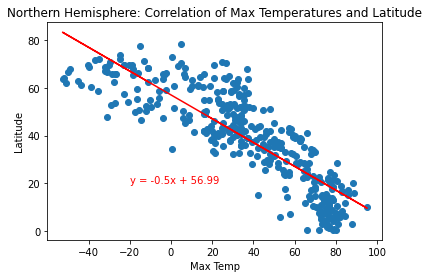

In [30]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem["Max Temp"],north_hem["Lat"])
regress_values = north_hem["Max Temp"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(north_hem["Max Temp"],north_hem["Lat"])
plt.plot(north_hem["Max Temp"],regress_values,"r-")
plt.annotate(line_eq,(-20,20),fontsize=10,color="red")
plt.title("Northern Hemisphere: Correlation of Max Temperatures and Latitude")
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.81x + -80.28


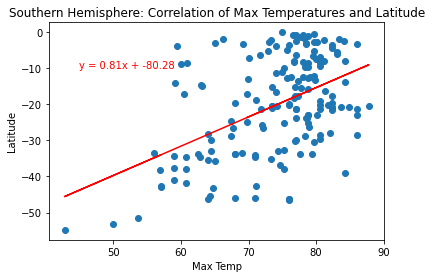

In [32]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem["Max Temp"],south_hem["Lat"])
regress_values = south_hem["Max Temp"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(south_hem["Max Temp"],south_hem["Lat"])
plt.plot(south_hem["Max Temp"],regress_values,"r-")
plt.annotate(line_eq,(45,-10),fontsize=10,color="red")
plt.title("Southern Hemisphere: Correlation of Max Temperatures and Latitude")
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.36x + 12.0


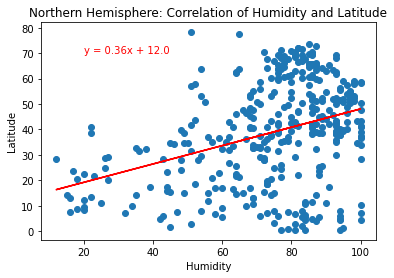

In [33]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem["Humidity"],north_hem["Lat"])
regress_values = north_hem["Humidity"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(north_hem["Humidity"],north_hem["Lat"])
plt.plot(north_hem["Humidity"],regress_values,"r-")
plt.annotate(line_eq,(20,70),fontsize=10,color="red")
plt.title("Northern Hemisphere: Correlation of Humidity and Latitude")
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.32x + -43.68


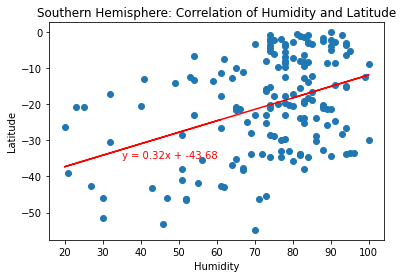

In [34]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem["Humidity"],south_hem["Lat"])
regress_values = south_hem["Humidity"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(south_hem["Humidity"],south_hem["Lat"])
plt.plot(south_hem["Humidity"],regress_values,"r-")
plt.annotate(line_eq,(35,-35),fontsize=10,color="red")
plt.title("Southern Hemisphere: Correlation of Humidity and Latitude")
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.11x + 32.7


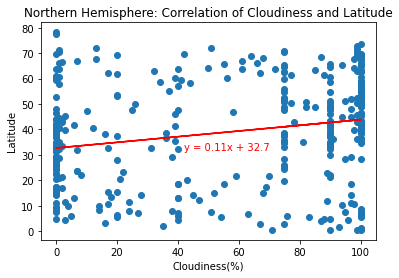

In [36]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem["Cloudiness(%)"],north_hem["Lat"])
regress_values = north_hem["Cloudiness(%)"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(north_hem["Cloudiness(%)"],north_hem["Lat"])
plt.plot(north_hem["Cloudiness(%)"],regress_values,"r-")
plt.annotate(line_eq,(42,32),fontsize=10,color="red")
plt.title("Northern Hemisphere: Correlation of Cloudiness and Latitude")
plt.xlabel('Cloudiness(%)')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.06x + -24.21


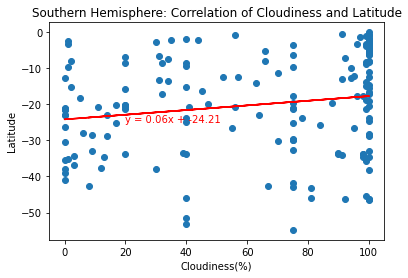

In [37]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem["Cloudiness(%)"],south_hem["Lat"])
regress_values = south_hem["Cloudiness(%)"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(south_hem["Cloudiness(%)"],south_hem["Lat"])
plt.plot(south_hem["Cloudiness(%)"],regress_values,"r-")
plt.annotate(line_eq,(20,-25),fontsize=10,color="red")
plt.title("Southern Hemisphere: Correlation of Cloudiness and Latitude")
plt.xlabel('Cloudiness(%)')
plt.ylabel('Latitude')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.64x + 36.58


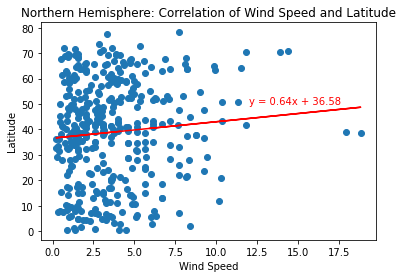

In [39]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem["Wind Speed"],north_hem["Lat"])
regress_values = north_hem["Wind Speed"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(north_hem["Wind Speed"],north_hem["Lat"])
plt.plot(north_hem["Wind Speed"],regress_values,"r-")
plt.annotate(line_eq,(12,50),fontsize=10,color="red")
plt.title("Northern Hemisphere: Correlation of Wind Speed and Latitude")
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -1.94x + -13.03


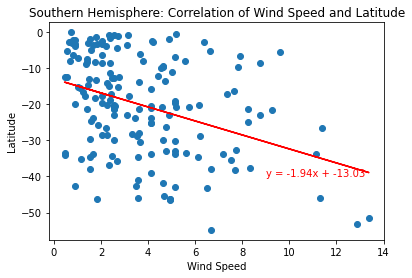

In [41]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem["Wind Speed"],south_hem["Lat"])
regress_values = south_hem["Wind Speed"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(south_hem["Wind Speed"],south_hem["Lat"])
plt.plot(south_hem["Wind Speed"],regress_values,"r-")
plt.annotate(line_eq,(9,-40),fontsize=10,color="red")
plt.title("Southern Hemisphere: Correlation of Wind Speed and Latitude")
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.show()